In [41]:
car_prices_df['Make-Model'].nunique()

772

In [43]:
# car_prices_df['Make-Model'].value_counts().sort_index()

In [48]:
## Question 1: How do sales differ by vehicle type? ##
# Part 1: Which vehicle type is most popular(like sedans, SUVs, trucks, electric vehicles)

# filtering the DataFrame to include only data in 2015
vehicle_type = car_prices_df[(car_prices_df["saleyear"] == 2015)]

# use group by to sperate the data by vehicle type,then calculate the total price of each group
vehicle_type = vehicle_type.groupby("Make-Model")["sellingprice"].sum()
vehicle_type

# The unique method shows every vehicle type in the car_prices data set
# unique = car_prices_df["body"].unique()
# unique 

Make-Model
acura-cl           154100.0
acura-ilx         1775450.0
acura-integra       43650.0
acura-legend         2825.0
acura-mdx        18031425.0
                    ...    
volvo-v70          260900.0
volvo-xc            32900.0
volvo-xc60        7234200.0
volvo-xc70        1554600.0
volvo-xc90        4989450.0
Name: sellingprice, Length: 769, dtype: float64

In [49]:
# most popular Make-Model
vehicle_type_max = vehicle_type.idxmax()
vehicle_type_max # Sedan

'ford-f-150'

In [50]:
# top 10 most popular vehicle type
print(vehicle_type.nlargest(10))

Make-Model
ford-f-150                  221909783.0
nissan-altima               171707796.0
ford-escape                 143162711.0
ford-fusion                 142306770.0
infiniti-g sedan            127608822.0
ford-explorer               116528766.0
toyota-camry                113849957.0
bmw-3 series                109780420.0
ford-edge                    90889580.0
chevrolet-silverado 1500     89089496.0
Name: sellingprice, dtype: float64


In [51]:
# least popular vehicle type
vehicle_type_min = vehicle_type.idxmin()
vehicle_type_min 

'toyota-paseo'

In [52]:
# top 10 least popular vehicle type
print(vehicle_type.nsmallest(10))

Make-Model
toyota-paseo            150.0
buick-roadmaster        250.0
chevrolet-corsica       350.0
geo-metro               400.0
honda-civic del sol     450.0
oldsmobile-achieva      500.0
nissan-300zx            750.0
ford-windstar cargo     775.0
daewoo-nubira           900.0
ford-aspire            1000.0
Name: sellingprice, dtype: float64


In [55]:
# the most popular Make-Mode in each state

# Group by state and Make-Model, then count the occurrences
popularity_state = car_prices_df.groupby(['state', 'Make-Model']).size().reset_index(name='counts')

# Sort within each state by count, descending
popularity_state = popularity_state.sort_values(['state', 'counts'], ascending=[True, False])
popularity_state

# drop duplicates keeping the first (most popular) entry for each state
most_popular_per_state = popularity_state.drop_duplicates(subset=['state'], keep='first')
most_popular_per_state

,state,Make-Model,counts
1,al,chevrolet-cruze,2
446,az,toyota-camry,242
1012,ca,nissan-altima,2425
1322,co,ford-f-150,245
2108,fl,nissan-altima,3284
2844,ga,toyota-camry,1003
3084,hi,nissan-altima,45
3498,il,nissan-altima,1521
3694,in,dodge-avenger,140
3983,la,chevrolet-impala,65


In [71]:
# part 2: Average price per type, expensive and cheapest vehicle type 
MakeModel_mean = car_prices_df.groupby("Make-Model")["sellingprice"].mean()
MakeModel_mean

# list them out from most expensive to cheapest (bar graph) 
MakeModel_mean_sorted = MakeModel_mean.sort_values(ascending=False)
MakeModel_mean_sorted

Make-Model
ferrari-458 italia          183000.000000
mercedes-benz-sls amg gt    156500.000000
bmw-i8                      154222.222222
rolls-royce-ghost           153456.250000
ferrari-california          131846.153846
                                ...      
ford-tempo                     333.333333
mercury-tracer                 312.500000
dodge-spirit                   300.000000
ford-windstar cargo            258.333333
toyota-paseo                   150.000000
Name: sellingprice, Length: 772, dtype: float64

In [76]:
# Print the first 10 most expensive vehicle types
print("Top 10 Most Expensive Make-Model:")
print(MakeModel_mean_sorted.head(10))

# Print a separator
print("\n" + "-"*50 + "\n")

# Print the 10 cheapest vehicle types
print("Top 10 Cheapest Make-Model:")
print(MakeModel_mean_sorted.tail(10))


Top 10 Most Expensive Make-Model:
Make-Model
ferrari-458 italia                       183000.000000
mercedes-benz-sls amg gt                 156500.000000
bmw-i8                                   154222.222222
rolls-royce-ghost                        153456.250000
ferrari-california                       131846.153846
mercedes-benz-sls amg                    116016.666667
lamborghini-gallardo                     111500.000000
bentley-continental gtc speed            111000.000000
ferrari-f430                             106250.000000
bentley-continental flying spur speed    105750.000000
Name: sellingprice, dtype: float64

--------------------------------------------------

Top 10 Cheapest Make-Model:
Make-Model
oldsmobile-cutlass supreme    407.500000
geo-metro                     400.000000
nissan-300zx                  375.000000
chevrolet-corsica             350.000000
oldsmobile-cutlass ciera      335.714286
ford-tempo                    333.333333
mercury-tracer                31

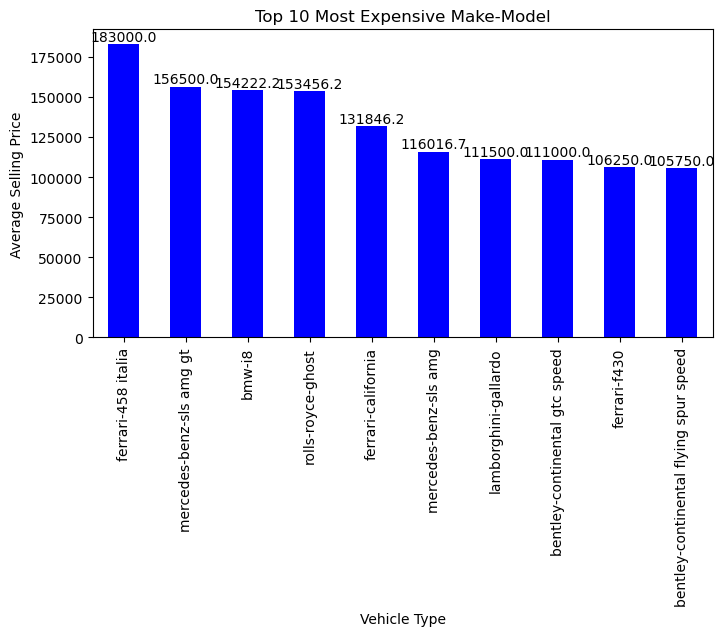

In [77]:
# visualization 
# Top 10 Most Expensive Make-Model
top_10_expensive = MakeModel_mean_sorted.head(10)
top_10_expensive.plot(kind='bar', figsize=(8, 4), color='blue')
plt.title('Top 10 Most Expensive Make-Model')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Selling Price')
# plt.xticks(rotation=60)

for index, value in enumerate(top_10_expensive):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom')
    
plt.show()

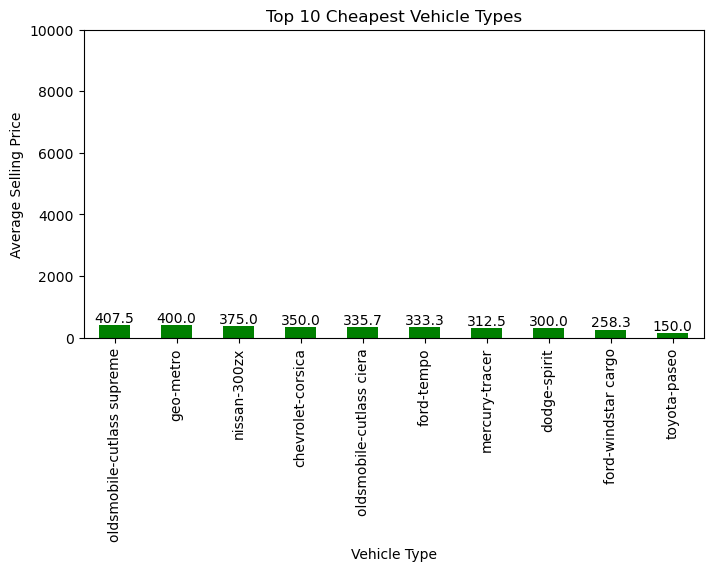

In [78]:
# Top 10 Cheapest Vehicle Types
top_10_cheapest = MakeModel_mean_sorted.tail(10)
top_10_cheapest.plot(kind='bar', figsize=(8, 4), color='green')
plt.title('Top 10 Cheapest Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Selling Price')
# plt.xticks(rotation=60)
plt.ylim(0, 10000)

for index, value in enumerate(top_10_cheapest):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom')
    
plt.show()